In [4]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import numpy as np
import matplotlib as mpl
import glob
import matplotlib
from scipy.io import FortranFile
import struct
import os

In [24]:
def read_var(filename,varname,size):
    f=open(filename+"/"+varname, "rb")
    dat = np.fromfile(f, dtype=np.float64, count=size, sep='')
    return dat

def read_parameter_file(fname="",evaluate=True,verbose=True,delimiter="="):
    # Read info file and create dictionary
    try:
        with open(fname) as f:
            content = f.readlines()
        f.close()
    except IOError:
        # Clean exit if the file was not found
        if verbose:
            print("File not found: "+fname)
        return 0
    infos={}
    for line in content:
        sp = line.split(delimiter)
        #print(sp)
        if len(sp) > 1:
            if evaluate:
                try:
                    infos[sp[0].strip()] = eval(sp[1].strip())
                except (NameError,SyntaxError):
                    infos[sp[0].strip()] = sp[1].strip()
            else:
                infos[sp[0].strip()] = sp[1].strip()
    return infos


def read_output(number,path='.'):
    
    if(number==-1):
        filelist = sorted(glob.glob(path+"/output*"))
        number = filelist[-1].split("_")[-1]
    print('Reading output '+str(number))
    filename= path+"/output_"+ str(number).zfill(5)
    infos=read_parameter_file(fname=filename+'/info.dat')
    data={}
    data['infos']=infos
    for key in infos:
        print(key+' = ',infos[key])
    data['nh'] = read_var(filename,'nh' , infos['nnh'])
    data['ni'] = read_var(filename,'ni' , infos['nnh'])
    data['ne'] = read_var(filename,'ne'  , infos['nnh'])
    zd = read_var(filename,'zd'  , infos['nnh']*infos['ndust'])
    data['zd'] = np.reshape(zd,(infos['ndust'],infos['nnh']),order = "C").T

    return data

In [25]:
data= read_output(1)

Reading output 1
nnh =  100
ndust =  10


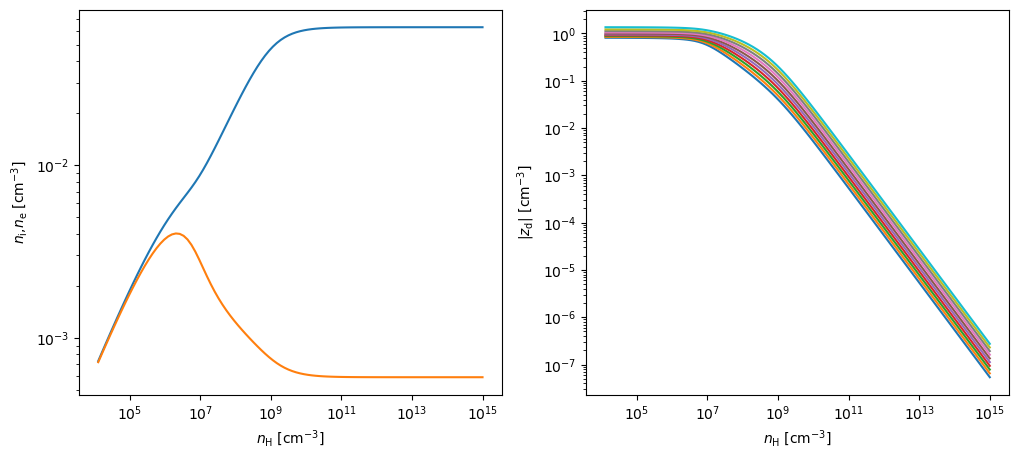

In [39]:
fig,ax= plt.subplots(1,2)
fig.set_size_inches(12,5)

ax[0].loglog(data['nh'],data['ni'],label='ni')
ax[0].loglog(data['nh'],data['ne'],label='ne')
ax[0].set_xlabel('$n_{\\mathrm{H}}$ [cm$^{-3}$]')
ax[0].set_ylabel('$n_{\\mathrm{i}}$,$n_{\\mathrm{e}}$ [cm$^{-3}$]')

for idust in range(data['infos']['ndust']):
    #print(data['zd'][:,idust])
    ax[1].loglog(data['nh'],-data['zd'][:,idust])

ax[1].set_xlabel('$n_{\\mathrm{H}}$ [cm$^{-3}$]')
ax[1].set_ylabel('$|z_{\\mathrm{d}}|$ [cm$^{-3}$]')

plt.show()
